In [1]:
from wcds import *

In [2]:
df_train = pd.read_csv(r"D:\data science data\abalone\train.csv", index_col='id')
df_test =   pd.read_csv(r"D:\data science data\abalone\test.csv", index_col='id')
df_train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
df_test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [4]:
df_original = pd.read_csv(r"D:\data science data\abalone\abalone.csv")
df_original.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df_original.shape

(4177, 9)

In [6]:
#concat orginal and train
df_train_merge = pd.concat([df_train, df_original.rename(columns={'Viscera weight':"Whole weight.2", 'Shucked weight':'Whole weight.1'})], ignore_index=True).drop_duplicates()


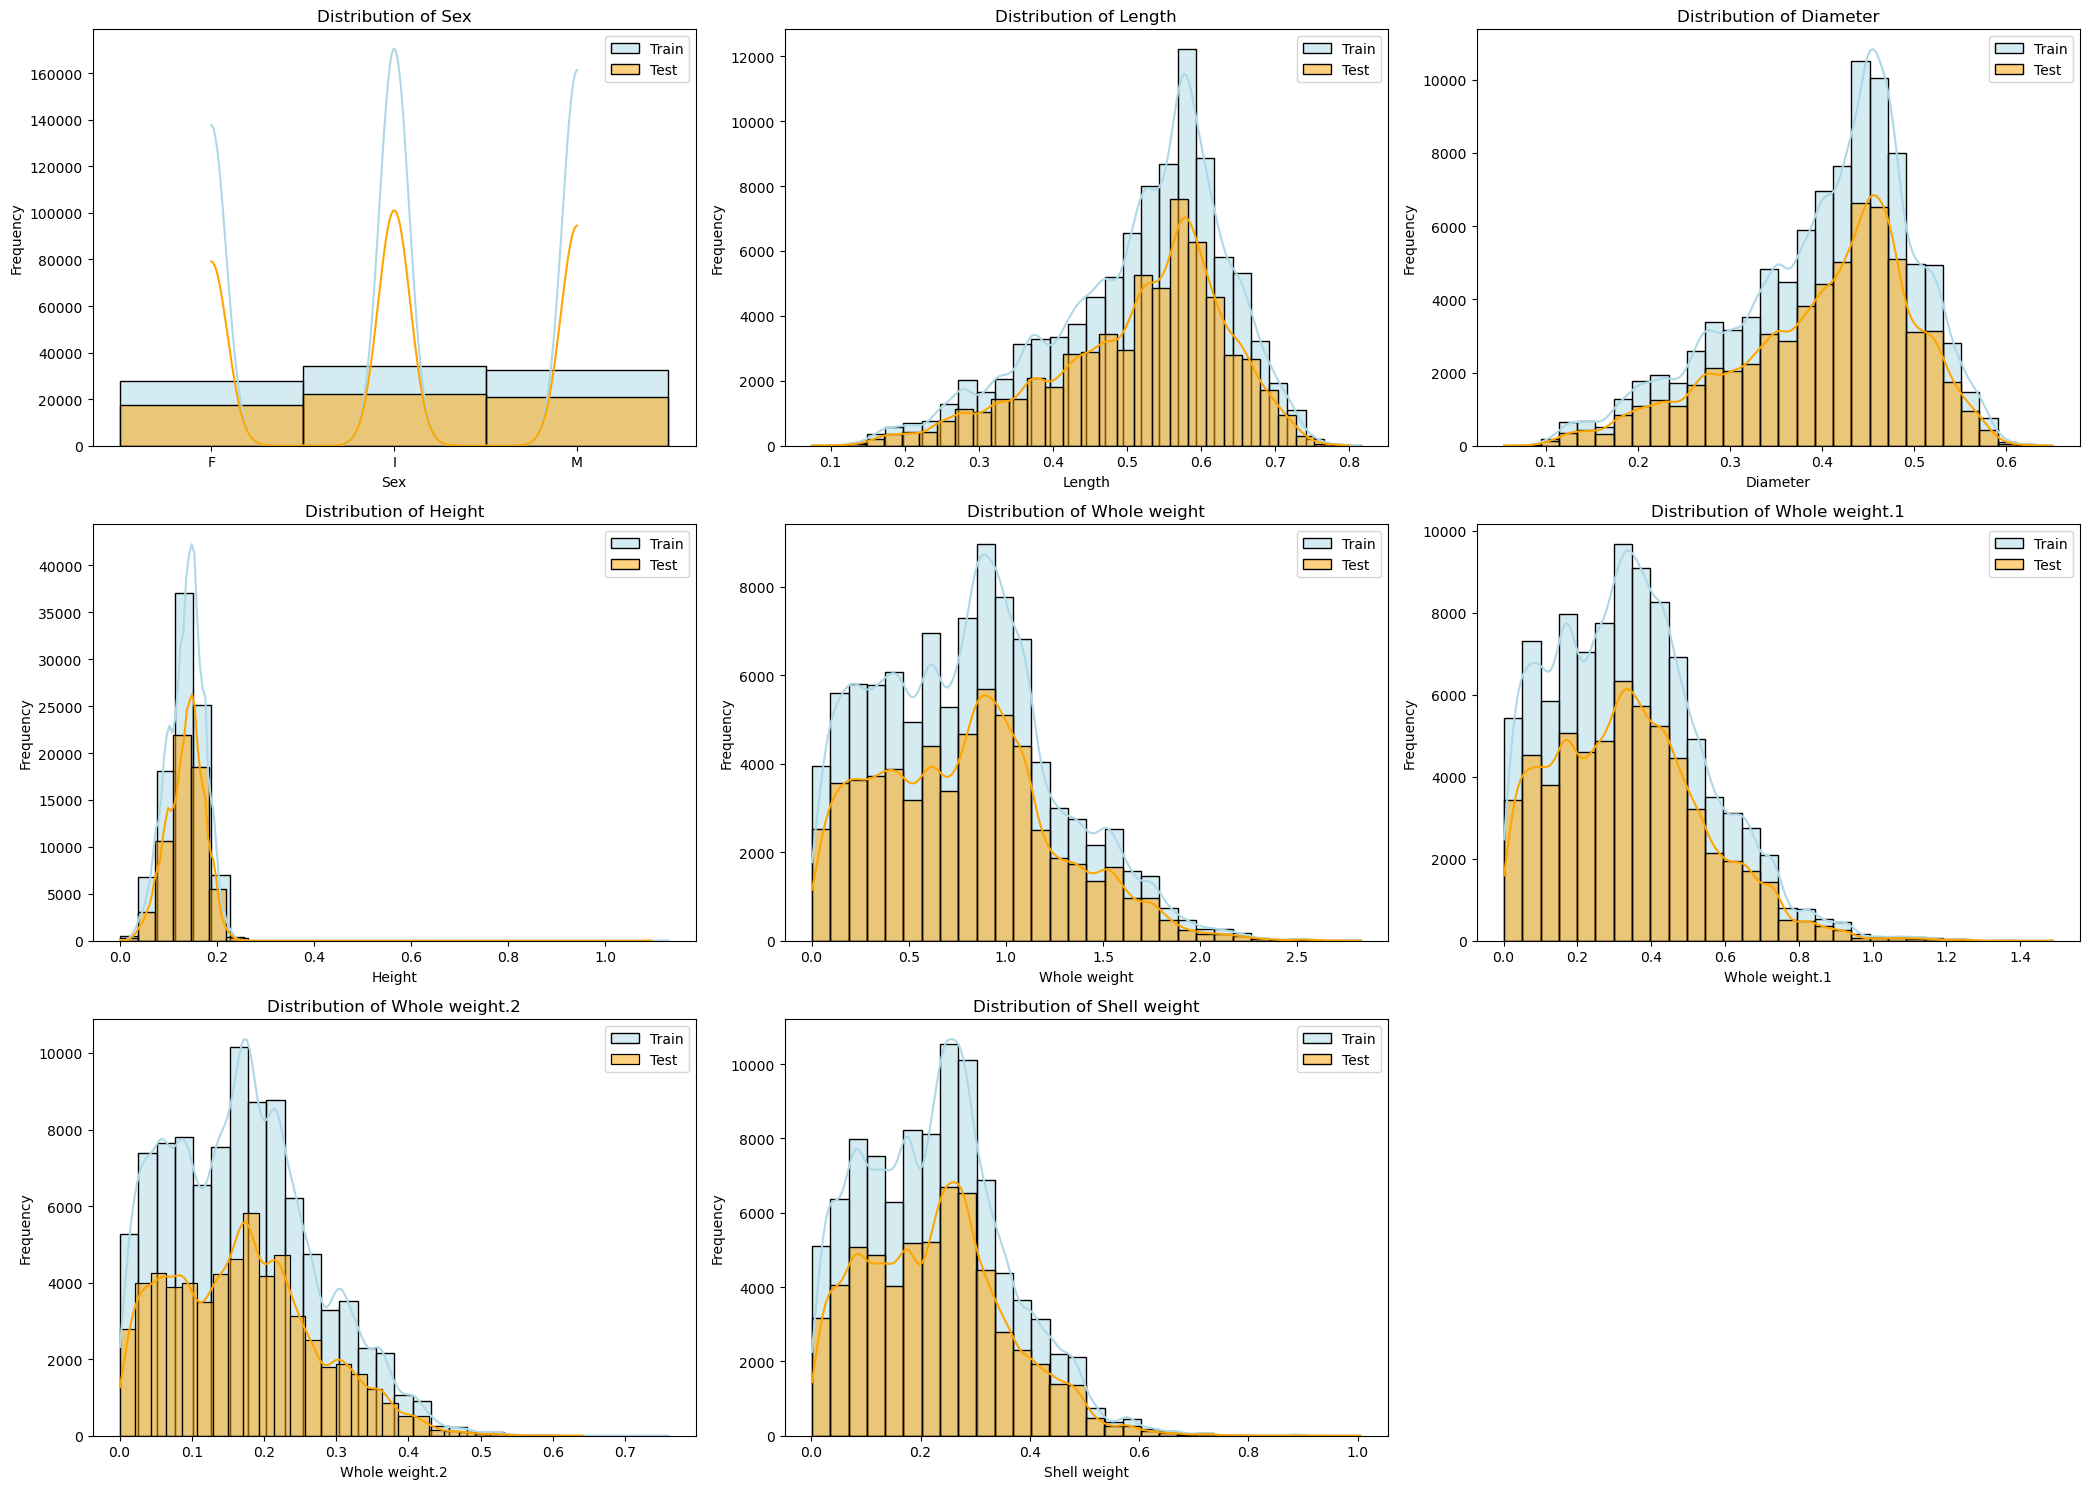

In [10]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', ]

colors = ['lightblue', 'orange', 'green']  

num_plots = len(cols)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.histplot(df_train_merge[feature], kde=True, color=colors[0], label='Train', alpha=0.5, bins=30, ax=ax)
    sns.histplot(df_test[feature], kde=True, color=colors[1], label='Test', alpha=0.5, bins=30, ax=ax)
    #sns.histplot(df_original[feature], kde=True, color=colors[2], label='Test', alpha=0.5, bins=30, ax=ax)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

In [7]:
df_train_merge.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
X_train = df_train_merge.drop(['Rings' ], axis =1)
y_train = df_train_merge['Rings']


In [9]:
#add new feature, need to test these feature if they are useful
#feature created pass in df, pass out df, use pipe to link them together 
#then use functional transformer to make it class,  because these rae stateless transformation

#get feature engineer from this notebook
#https://www.kaggle.com/code/yorkyong/abalone-regression-ensemble


 # Shell volume

def add_feature (df, max_ratio, shell_volume_flag, meat_shell_flag, shell_surface_flag, proportional_weight_flag, dimension_ratio_flag ):
    df = df.copy()
    #shell volume flag
    if shell_volume_flag:
        df['Shell_Volume'] = df['Length'] * df['Diameter'] * df['Height']

    # Meat to shell ratio
    if meat_shell_flag:
        df['Meat_to_Shell_Ratio'] = df['Whole weight.1'] / df['Shell weight']

    # Shell surface area
    if shell_surface_flag:
        df['Shell_Surface_Area'] = 2 * ((df['Length'] * df['Diameter']) + (df['Length'] * df['Height']) + (df['Diameter'] * df['Height']))

    # Proportional weights
    if proportional_weight_flag:
        df['Whole_to_Shell_Ratio'] = df['Whole weight'] / df['Shell weight']
        df['Shucked_to_Whole_Ratio'] = df['Whole weight.1'] / df['Whole weight']
        df['Viscera_to_Whole_Ratio'] = df['Whole weight.2'] / df['Whole weight']

    # Dimension ratios
    if dimension_ratio_flag:
        df['Length_to_Diameter_Ratio'] = df['Length'] / df['Diameter']
        df['Length_to_Height_Ratio'] = df['Length'] / df['Height']
        df['Length_to_Height_Ratio'] = df['Length_to_Height_Ratio'].apply(lambda df: min(df, max_ratio))

        df['Diameter_to_Height_Ratio'] = df['Diameter'] / df['Height']
        df['Diameter_to_Height_Ratio'] = df['Diameter_to_Height_Ratio'].apply(lambda df: min(df, max_ratio))

    return df


In [10]:
#form pipeline
'''
1. add feature
2. select numeric and categorical
3. column transform
4. PCA
5. estimator 
'''

'\n1. add feature\n2. select numeric and categorical\n3. column transform\n4. PCA\n5. estimator \n'

In [11]:
cat_columns  = ['Sex']

num_pipeline = make_pipeline (
    ExcludeColumnSelector(cat_columns),
    SimpleImputer(strategy="median"),    
    Pipeline_winsorize(), #powertransform()
    StandardScaler(),
    Pipeline_Drop_correlated_features(0.95)
    )

cat_pipeline = make_pipeline(
        IncludeColumnSelector(cat_columns),        
        SimpleImputer(strategy="constant", fill_value='Missing'),
        OneHotEncoder(sparse_output= False, handle_unknown='ignore'),
    )

preprocessor = make_union (num_pipeline, cat_pipeline)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor()

In [13]:
#full pipeline
pipe = Pipeline([('add feature', FunctionTransformer(add_feature, kw_args={"max_ratio":1, "shell_volume_flag" :1, "meat_shell_flag":1, "shell_surface_flag":1, "proportional_weight_flag":1, "dimension_ratio_flag":1})),
                 ('preprocess', preprocessor),
                 ('robust scaler', RobustScaler()),
                 ('pca', PCA()),                
                 ('estimator', rf)                 
                 ])
                     
pipe.fit(X_train, y_train)
pipe.get_params()
                     
                     

{'memory': None,
 'steps': [('add feature',
   FunctionTransformer(func=<function add_feature at 0x000001B34B0F4D60>,
                       kw_args={'dimension_ratio_flag': 1, 'max_ratio': 1,
                                'meat_shell_flag': 1,
                                'proportional_weight_flag': 1,
                                'shell_surface_flag': 1, 'shell_volume_flag': 1})),
  ('preprocess',
   FeatureUnion(transformer_list=[('pipeline-1',
                                   Pipeline(steps=[('excludecolumnselector',
                                                    ExcludeColumnSelector(subset=['Sex'])),
                                                   ('simpleimputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('pipeline_winsorize',
                                                    <wcds.tools._pipeline.Pipeline_winsorize object at 0x000001B355517390>),
                

In [25]:
pipe

Pipeline(steps=[('add feature',
                 FunctionTransformer(func=<function add_feature at 0x000001B34B0F4D60>,
                                     kw_args={'dimension_ratio_flag': 1,
                                              'max_ratio': 1,
                                              'meat_shell_flag': 1,
                                              'proportional_weight_flag': 1,
                                              'shell_surface_flag': 1,
                                              'shell_volume_flag': 1})),
                ('preprocess',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('excludecolumnselector',
                                                                  ExcludeC...
                                                                  Pipeline_Drop_correlated_features(threshold=0.95))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('includecolumnselector',
                                                                  IncludeColumnSelector(subset=['Sex'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='Missing',
                                                                                strategy='constant')),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse_output=False))]))])),
                ('robust scaler', RobustScaler()), ('pca', PCA()),
                ('estimator', RandomForestRegressor())])

In [20]:
filter_list('robust', pipe.get_params())

['robust scaler',
 'robust scaler__copy',
 'robust scaler__quantile_range',
 'robust scaler__unit_variance',
 'robust scaler__with_centering',
 'robust scaler__with_scaling']

In [23]:
#write optuna parameter tuning 

param_grid = [
    #pipeline param
    {'add feature__kw_args': [{i:[0, 1]} for i in ["shell_volume_flag" , "meat_shell_flag", "shell_surface_flag", "proportional_weight_flag", "dimension_ratio_flag"]],
    'preprocess__pipeline-1__pipeline_winsorize' : [Pipeline_winsorize(), PowerTransformer(), 'passthrough'], 
    'preprocess__pipeline-1__pipeline_drop_correlated_features__threshold':[1,0.98, 0.95, 0.9],    
    'pca__n_components':[1, 0.95, 0.9],
    'robust scaler':['passthrough', RobustScaler()]
    }
]

In [15]:
[{i:[0, 1]} for i in ["shell_volume_flag" , "meat_shell_flag", "shell_surface_flag", "proportional_weight_flag", "dimension_ratio_flag"]]

[{'shell_volume_flag': [0, 1]},
 {'meat_shell_flag': [0, 1]},
 {'shell_surface_flag': [0, 1]},
 {'proportional_weight_flag': [0, 1]},
 {'dimension_ratio_flag': [0, 1]}]

In [24]:
#write optuna code to integrate these
import optuna
import lightgbm
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [54]:
#test if I don't use target transform
def objective(trial):

    pipe_param = {
        "pca_n_components_cat": trial.suggest_categorical("pca_n_components_cat", ["PCA", None]),
        "robust_scaler_op": trial.suggest_categorical("robust_scaler_op", ["robust", None]),
        "correlated_features__threshold":trial.suggest_float("correlated_features__threshold", 0.95, 1.0, step = 0.01),
        "outlier removal":trial.suggest_categorical("outlier removal", ["winsorize", 'PowerTransformer']),
        "add_feature_op":{
                'shell_volume_flag': trial.suggest_int('shell_volume_flag',0, 1),
                'meat_shell_flag': trial.suggest_int('meat_shell_flag', 0, 1),
                'shell_surface_flag': trial.suggest_int('shell_surface_flag',0, 1),
                'proportional_weight_flag': trial.suggest_int('proportional_weight_flag', 0, 1),
                'dimension_ratio_flag': trial.suggest_int('dimension_ratio_flag', 0, 1)
        }
    }
    
    #define outlier removal
    if pipe_param["outlier removal"] == "winsorize":
        outlier_removal = Pipeline_winsorize()
    elif pipe_param["outlier removal"] == "PowerTransformer":
        outlier_removal = PowerTransformer()
    else:  
        outlier_removal =  'passthrough'


    #Define the PCA algorithm and its hyperparameters
    if pipe_param["pca_n_components_cat"]  == "PCA":
        pca_n_components=trial.suggest_float("pca_n_components", 0.9, 1, ) # suggest an integer from 2 to 30
        pca_algorithm=PCA(n_components=pca_n_components)    
    else:
        pca_algorithm='passthrough'

    #define robuster scaler 
    if pipe_param["robust_scaler_op"]  == "robust":
        robust_algorithm = RobustScaler()           
    else:
        robust_algorithm='passthrough'
    

    # -- Instantiate estimator model

    lgbm_param = {
        
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        #"num_class": 7,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.025),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 6, 14),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
    }

    model = lightgbm.LGBMRegressor( **lgbm_param)


    cat_columns  = ['Sex']

    num_pipeline = make_pipeline (
        ExcludeColumnSelector(cat_columns),
        SimpleImputer(strategy="median"),    
        outlier_removal, 
        StandardScaler(),
        Pipeline_Drop_correlated_features(pipe_param["correlated_features__threshold"])
    )

    cat_pipeline = make_pipeline(
            IncludeColumnSelector(cat_columns),        
            SimpleImputer(strategy="constant", fill_value='Missing'),
            OneHotEncoder(sparse_output= False, handle_unknown='ignore'),
    )

    preprocessor = make_union (num_pipeline, cat_pipeline)



    pipe = Pipeline(
                [('add feature', FunctionTransformer(add_feature, kw_args={"max_ratio":1, **pipe_param["add_feature_op"]})),
                 ('preprocess', preprocessor),
                 ('robust scaler', robust_algorithm),
                 ('pca', pca_algorithm),                
                 ('estimator', model)                 
                 ]
                 )

    skf = StratifiedKFold(n_splits=5) 
    
    cv_score = cross_val_score(pipe, X_train, y_train, n_jobs=4, cv=skf, scoring='neg_mean_squared_log_error',verbose=1, error_score='raise')

    return cv_score.mean()



study = optuna.create_study(direction="maximize") # maximise the score during tuning
study.optimize(objective, n_trials=100) # run the objective function 100 times

print(study.best_trial) # print the best performing pipeline

[I 2024-04-20 16:05:33,486] A new study created in memory with name: no-name-d5717bfc-a369-4b90-88bc-e666c6902df7
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   17.9s finished
[I 2024-04-20 16:05:51,622] Trial 0 finished with value: -0.024053535240482576 and parameters: {'pca_n_components_cat': 'PCA', 'robust_scaler_op': None, 'correlated_features__threshold': 0.98, 'outlier removal': 'PowerTransformer', 'shell_volume_flag': 0, 'meat_shell_flag': 0, 'shell_surface_flag': 1, 'proportional_weight_flag': 1, 'dimension_ratio_flag': 0, 'pca_n_components': 0.9625124169032322, 'learning_rate': 0.02912351451167562, 'n_estimators': 549, 'lambda_l1': 0.018315973588752536, 'lambda_l2': 0.02083669914766322, 'max_depth': 14, 'colsample_bytree': 0.8811871970745269, 'subsample': 0.6782065718865737, 'min_child_samples': 38}. Best is trial 0 with value: -0.024053535240482576.
[Parallel(n_jobs=4)]: Using backend LokyBacke

FrozenTrial(number=96, values=[-0.02254872163783126], datetime_start=datetime.datetime(2024, 4, 20, 16, 21, 36, 985197), datetime_complete=datetime.datetime(2024, 4, 20, 16, 21, 45, 369864), params={'pca_n_components_cat': None, 'robust_scaler_op': None, 'correlated_features__threshold': 1.0, 'outlier removal': 'winsorize', 'shell_volume_flag': 0, 'meat_shell_flag': 1, 'shell_surface_flag': 0, 'proportional_weight_flag': 1, 'dimension_ratio_flag': 1, 'learning_rate': 0.02921557367972967, 'n_estimators': 600, 'lambda_l1': 0.022823034126781418, 'lambda_l2': 0.058129076609698564, 'max_depth': 6, 'colsample_bytree': 0.394895221958369, 'subsample': 0.6267853976873976, 'min_child_samples': 19}, distributions={'pca_n_components_cat': CategoricalDistribution(choices=('PCA', None)), 'robust_scaler_op': CategoricalDistribution(choices=('robust', None)), 'correlated_features__threshold': DiscreteUniformDistribution(high=1.0, low=0.95, q=0.01), 'outlier removal': CategoricalDistribution(choices=('

In [55]:
print(study.best_value, study.best_params)

-0.02254872163783126 {'pca_n_components_cat': None, 'robust_scaler_op': None, 'correlated_features__threshold': 1.0, 'outlier removal': 'winsorize', 'shell_volume_flag': 0, 'meat_shell_flag': 1, 'shell_surface_flag': 0, 'proportional_weight_flag': 1, 'dimension_ratio_flag': 1, 'learning_rate': 0.02921557367972967, 'n_estimators': 600, 'lambda_l1': 0.022823034126781418, 'lambda_l2': 0.058129076609698564, 'max_depth': 6, 'colsample_bytree': 0.394895221958369, 'subsample': 0.6267853976873976, 'min_child_samples': 19}
